# $H_2$ experiments

In [9]:
try:
  import qiskit
  import qiskit_aer
  import qiskit_nature
  import qiskit_ibm_runtime
  import pyscf
  import pylatexenc
except:
  !pip install qiskit qiskit-aer qiskit-ibm-runtime qiskit_nature pyscf pylatexenc

# General imports
import numpy as np

# Qiskit Runtime
from qiskit.primitives import Estimator
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo

# SciPy minimizer routine
from scipy.optimize import minimize

# Plotting functions
import matplotlib.pyplot as plt

# Local imports
from src.moleculemanager import MoleculeManager
from src.helpers import *

In [10]:
# molecule definition
hh = MoleculeInfo(
  symbols=["H", "H"],
  coords=([0.0, 0.0, 0.0], [1.0, 0.0, 0.0]),
  multiplicity=1,  # = 2*spin + 1
  charge=0,
)

molecule = MoleculeManager(hh, "$H_2$")

Number of particles : (1, 1)
Number of spatial orbitals : 2
Orbital energies : [-0.48444168  0.45750194]


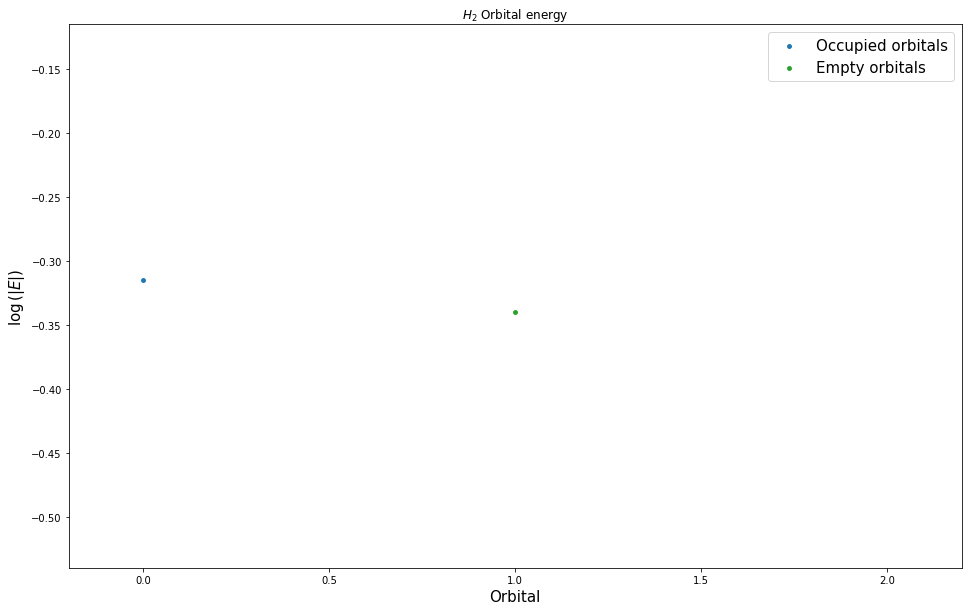

In [11]:
draw_orbitals(molecule.get_problem(), molecule.name)

In [4]:
domain = np.linspace(0.1, 2, 300)

exact_energies = []
vqe_energies = []

for dist in domain:
  molecule.SetAtomCoords(([0.0, 0.0, 0.0], [dist, 0.0, 0.0]))
  exact_res, vqe_res = molecule.Experiment(
    optimizer_type=COBYLA(maxiter=200, tol=0.0001)
  )
  exact_energies.append(exact_res.total_energies)
  vqe_energies.append(vqe_res.total_energies)

16:13:23 FindGroundStateExactSolver started.
Exact result:
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -2.581811338333
  - computed part:      -2.581811338333
  - FreezeCoreTransformer extracted energy part: 0.0
~ Nuclear repulsion energy (Hartree): 5.2917721092
> Total ground state energy (Hartree): 2.709960770867
 
=== MEASURED OBSERVABLES ===
 
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.18897261  0.0  0.0]
 
16:13:23 FindGroundStateExactSolver done.
16:13:23 FindGroundStateVQE started.
16:13:23 ansatz initialized
ansatz.depth = 1
num of qubits = 2
16:13:23 VQE compute_minimum_eigenvalue done
VQE result:
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -2.58181133223
  - computed part:      -2.58181133223
  - FreezeCoreTransformer extracted energy part: 0.0
~ Nuclear repulsion energy (Hartree): 5.2917721092
> Total ground state energy (Hartree): 2.70996077697
 
=== MEASURED OBSERVABLES ===
 
 
=== DIPOLE MOMENT

## Plot comparison between VQE and ExactSolver

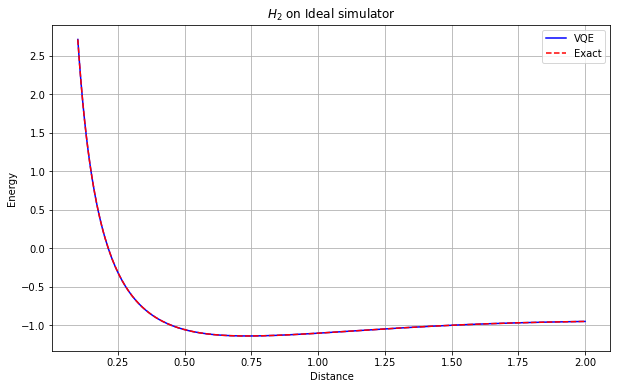

In [5]:
plot_comparisons(
  data=[vqe_energies, exact_energies],
  labels=['VQE', 'Exact'],
  domain=domain,
  colors=['blue', 'red'],
  linestyles=['solid', '--'],
  title=f'{molecule.name} on Ideal simulator'
)

## Plot VQE error

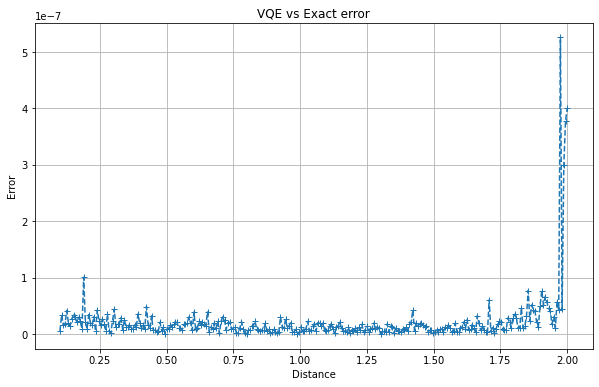

In [6]:
plot_error(
  vals_1=exact_energies,
  vals_2=vqe_energies,
  domain=domain,
  title='VQE vs Exact error'
)

## Run on noisy simulator

In [14]:
noisy_domain = np.linspace(0.1, 2, 20)

noisy_vqe_energies = []
noisy_exact_energies = []

for dist in noisy_domain:
  molecule.SetAtomCoords(([0.0, 0.0, 0.0], [dist, 0.0, 0.0]))
  exact_res, vqe_res = molecule.Experiment(
    optimizer_type=COBYLA(maxiter=20, tol=0.0001),
    noisy_mode=True,
  )
  noisy_vqe_energies.append(vqe_res.total_energies)
  noisy_exact_energies.append(exact_res.total_energies)

17:19:24 FindGroundStateExactSolver started.
Exact result:
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -2.581811338333
  - computed part:      -2.581811338333
  - FreezeCoreTransformer extracted energy part: 0.0
~ Nuclear repulsion energy (Hartree): 5.2917721092
> Total ground state energy (Hartree): 2.709960770867
 
=== MEASURED OBSERVABLES ===
 
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.18897261  0.0  0.0]
 
17:19:24 FindGroundStateExactSolver done.
17:19:24 FindGroundStateVQE started.
17:19:26 ansatz initialized
ansatz.depth = 1
num of qubits = 2
17:19:32 VQE compute_minimum_eigenvalue done
VQE result:
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -2.429531532874
  - computed part:      -2.429531532874
  - FreezeCoreTransformer extracted energy part: 0.0
~ Nuclear repulsion energy (Hartree): 5.2917721092
> Total ground state energy (Hartree): 2.862240576326
 
=== MEASURED OBSERVABLES ===
 
 
=== DIPOLE MOM

## Compare VQE on noisy simulator vs Ideal simulator & Exact solver 

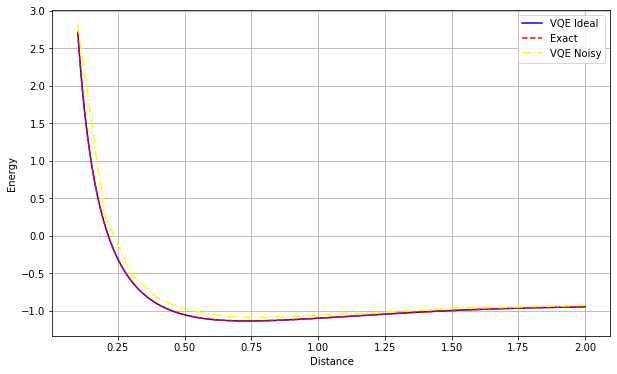

In [8]:
plot_comparisons(
  data=[(vqe_energies, domain), (exact_energies, domain),(noisy_vqe_energies, noisy_domain)],
  labels=['VQE Ideal', 'Exact', 'VQE Noisy'],
  colors=['blue', 'red', 'yellow'],
  linestyles=['solid', '--', 'dashdot'],
)

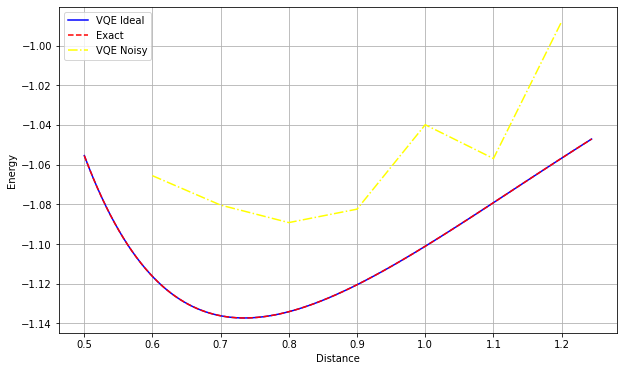

In [18]:
plot_comparisons(
  data=[(vqe_energies, domain), (exact_energies, domain),(noisy_vqe_energies, noisy_domain)],
  labels=['VQE Ideal', 'Exact', 'VQE Noisy'],
  colors=['blue', 'red', 'yellow'],
  linestyles=['solid', '--', 'dashdot'],
  lower_bound=0.5,
  upper_bound=1.25
)

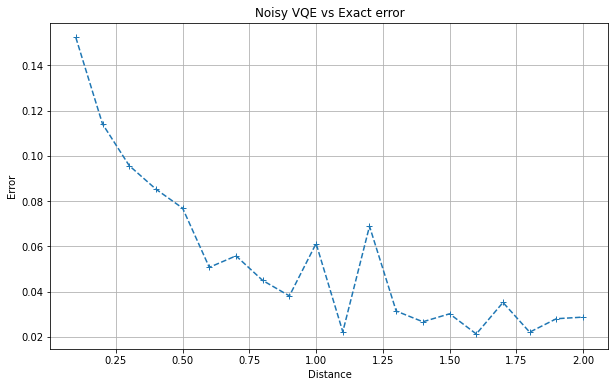

In [16]:
plot_error(
  vals_1=noisy_exact_energies,
  vals_2=noisy_vqe_energies,
  domain=noisy_domain,
  title='Noisy VQE vs Exact error'
)